# Pemrosesan citra pada domain frekuensi

Ichwan Rizky Wahyudin (1301213434)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from PIL import Image

### kernels untuk convolution

In [8]:

g1 = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

g2 = np.array([
    [0, -1, 0],
    [0, 4, 0],
    [0, -1, 0]
])

g3 = np.array([
    [0, -1, 0],
    [0, 5, 0],
    [0, -1, 0]
])

### Menerapkan kernels conv ke gambar

In [11]:
image_rgb = Image.open('../images/dog.jpg')
image_gray = image_rgb.convert('L')
image_gray = np.array(image_gray)

lowpass = signal.convolve2d(image_gray, g1, boundary='symm', mode='same')
highpass = signal.convolve2d(image_gray, g2, boundary='symm', mode='same')
bandpass = signal.convolve2d(image_gray, g3, boundary='symm', mode='same')

fft_original = np.fft.fftshift(np.fft.fft2(image_gray))
fft_lowpass = np.fft.fftshift(np.fft.fft2(lowpass))
fft_highpass = np.fft.fftshift(np.fft.fft2(highpass))
fft_bandpass = np.fft.fftshift(np.fft.fft2(bandpass))

### Hasil

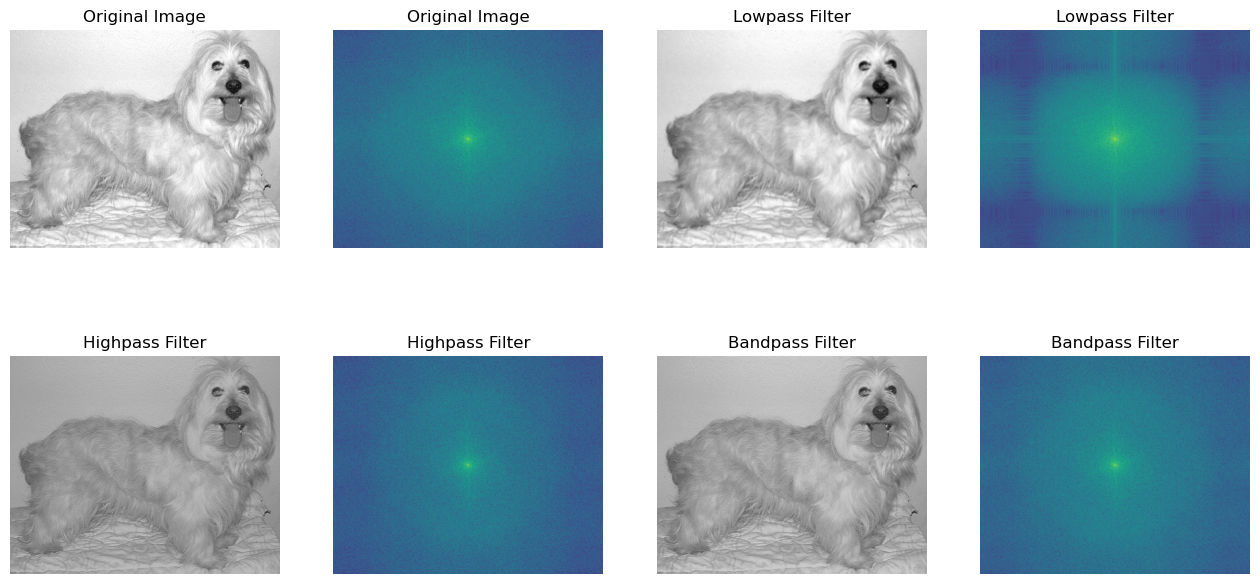

In [13]:
plt.figure(figsize=(16, 12))

plt.subplot(3, 4, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(np.log(np.abs(fft_original)), cmap='viridis')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 4, 3)
plt.imshow(lowpass, cmap='gray')
plt.title('Lowpass Filter')
plt.axis('off')

plt.subplot(3, 4, 4)
plt.imshow(np.log(np.abs(fft_lowpass)), cmap='viridis')
plt.title('Lowpass Filter')
plt.axis('off')

plt.subplot(3, 4, 5)
plt.imshow(highpass, cmap='gray')
plt.title('Highpass Filter')
plt.axis('off')

plt.subplot(3, 4, 6)
plt.imshow(np.log(np.abs(fft_highpass)), cmap='viridis')
plt.title('Highpass Filter')
plt.axis('off')

plt.subplot(3, 4, 7)
plt.imshow(bandpass, cmap='gray')
plt.title('Bandpass Filter')
plt.axis('off')

plt.subplot(3, 4, 8)
plt.imshow(np.log(np.abs(fft_bandpass)), cmap='viridis')
plt.title('Bandpass Filter')
plt.axis('off')

plt.show()